<a href="https://colab.research.google.com/github/gia-cat-bui-le/SiEMA/blob/main/In_sample_Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-sample Backtesting

> **Group 07**
>
> Student 1: Phạm Việt Hoàng - 20125031
>
> Student 2: Phan Huỳnh Tấn Phát - 20125047
>
> Student 3: Bùi Lê Gia Cát - 20125071


In [1]:
!pip install psycopg2

In [2]:
from typing import List
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import time
import json
import psycopg2
import pytz

In [3]:
# host: api.algotrade.vn
db_host = 'api.algotrade.vn'
# port: 5432
db_port = 5432
# database: algotradeDB
db_name = 'algotradeDB'
# user: intern_read_only
db_user = 'intern_read_only'
# pass: Bingo@0711
db_pass = 'Bingo@0711'

In [4]:
def connectDb():
  """ Connect to the PostgreSQL database server """
  try:
    # connecting to the PostgreSQL server
    with psycopg2.connect(
      host= db_host,
      port= db_port,
      database= db_name,
      user= db_user,
      password= db_pass,
    ) as conn:
      print('Connected to the PostgreSQL server.')
      return conn
  except (psycopg2.DatabaseError, Exception) as error:
      print(error)

In [5]:
conn = connectDb()

Connected to the PostgreSQL server.


In [6]:
conn

<connection object at 0x7f261a800b80; dsn: 'user=intern_read_only password=xxx dbname=algotradeDB host=api.algotrade.vn port=5432', closed: 0>

# Plot input data

In [7]:
def get_close():
  try:
    with psycopg2.connect(
      host= db_host,
      port= db_port,
      database= db_name,
      user= db_user,
      password= db_pass,
    ) as conn:
      with conn.cursor() as cur:
        cur.execute("""
          select tb_close.datetime as datetime, tb_close.tickersymbol as symbol,
          tb_close.price as close
          from (
            select *
            from quote.close m
          ) tb_close
          where tb_close.tickersymbol = 'VN30F2311'
          and tb_close.datetime between '2023-09-22' and '2023-11-17';
        """)
        rows = cur.fetchall()
        print("The number of parts: ", cur.rowcount)
        for row in rows:
          print(row)
        return rows
  except (Exception, psycopg2.DatabaseError) as error:
    print(error)

In [8]:
rows = get_close()

The number of parts:  40
(datetime.date(2023, 9, 22), 'VN30F2311', Decimal('1190.00'))
(datetime.date(2023, 9, 25), 'VN30F2311', Decimal('1165.00'))
(datetime.date(2023, 9, 26), 'VN30F2311', Decimal('1155.40'))
(datetime.date(2023, 9, 27), 'VN30F2311', Decimal('1164.00'))
(datetime.date(2023, 9, 28), 'VN30F2311', Decimal('1162.80'))
(datetime.date(2023, 9, 29), 'VN30F2311', Decimal('1162.70'))
(datetime.date(2023, 10, 2), 'VN30F2311', Decimal('1165.00'))
(datetime.date(2023, 10, 3), 'VN30F2311', Decimal('1131.00'))
(datetime.date(2023, 10, 4), 'VN30F2311', Decimal('1134.50'))
(datetime.date(2023, 10, 5), 'VN30F2311', Decimal('1124.00'))
(datetime.date(2023, 10, 6), 'VN30F2311', Decimal('1124.00'))
(datetime.date(2023, 10, 9), 'VN30F2311', Decimal('1142.40'))
(datetime.date(2023, 10, 10), 'VN30F2311', Decimal('1155.40'))
(datetime.date(2023, 10, 11), 'VN30F2311', Decimal('1163.20'))
(datetime.date(2023, 10, 12), 'VN30F2311', Decimal('1159.30'))
(datetime.date(2023, 10, 13), 'VN30F2311',

In [9]:
rows = {
    'Date': [date for date, _, _ in rows],
    'Close': [close for _, _, close in rows]
}

In [10]:
rows

{'Date': [datetime.date(2023, 9, 22),
  datetime.date(2023, 9, 25),
  datetime.date(2023, 9, 26),
  datetime.date(2023, 9, 27),
  datetime.date(2023, 9, 28),
  datetime.date(2023, 9, 29),
  datetime.date(2023, 10, 2),
  datetime.date(2023, 10, 3),
  datetime.date(2023, 10, 4),
  datetime.date(2023, 10, 5),
  datetime.date(2023, 10, 6),
  datetime.date(2023, 10, 9),
  datetime.date(2023, 10, 10),
  datetime.date(2023, 10, 11),
  datetime.date(2023, 10, 12),
  datetime.date(2023, 10, 13),
  datetime.date(2023, 10, 16),
  datetime.date(2023, 10, 17),
  datetime.date(2023, 10, 18),
  datetime.date(2023, 10, 19),
  datetime.date(2023, 10, 20),
  datetime.date(2023, 10, 23),
  datetime.date(2023, 10, 24),
  datetime.date(2023, 10, 25),
  datetime.date(2023, 10, 26),
  datetime.date(2023, 10, 27),
  datetime.date(2023, 10, 30),
  datetime.date(2023, 10, 31),
  datetime.date(2023, 11, 1),
  datetime.date(2023, 11, 2),
  datetime.date(2023, 11, 3),
  datetime.date(2023, 11, 6),
  datetime.date(

in-sample data

In [11]:
dataframe = pd.DataFrame.from_dict(rows)
dataframe

,Date,Close
0,2023-09-22,1190.00
1,2023-09-25,1165.00
2,2023-09-26,1155.40
3,2023-09-27,1164.00
4,2023-09-28,1162.80
5,2023-09-29,1162.70
6,2023-10-02,1165.00
7,2023-10-03,1131.00
8,2023-10-04,1134.50
9,2023-10-05,1124.00


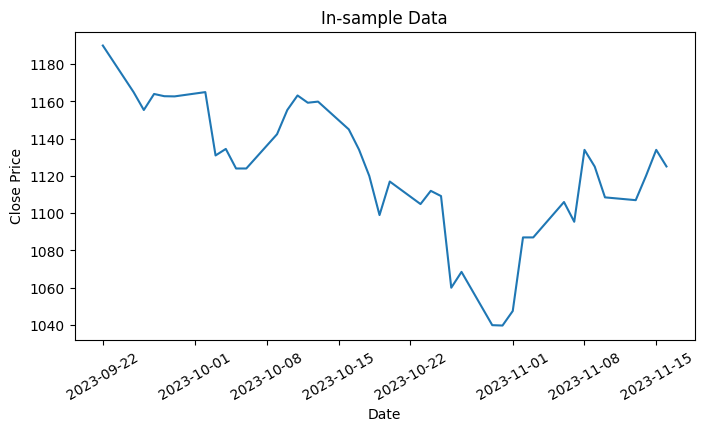

In [12]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(dataframe['Date'], dataframe['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('In-sample Data')
plt.xticks(rotation=30)
plt.show()